# Taller 02 
- David Pilataxi 
- Gr1CC
- 9 de noviembre de 2024


### Dibujar la ecuación $y(x)=x^3-3x^2+x-1$

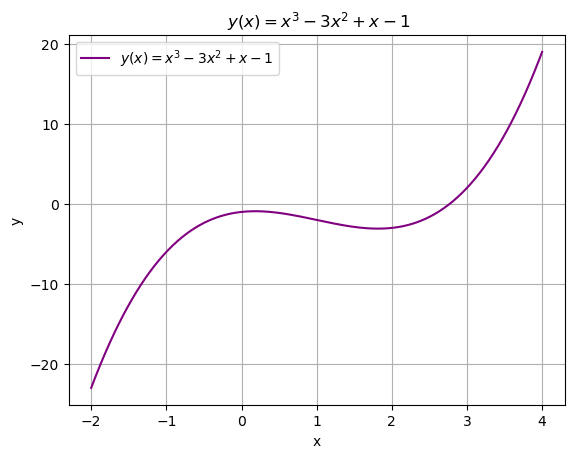

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Definir la función
def y(x):
    return x**3 - 3*x**2 + x - 1

# Crear un rango de valores para x
x = np.linspace(-2, 4, 400)
# Calcular los valores correspondientes de y
y_values = y(x)

# Crear la gráfica
plt.plot(x, y_values, label='$y(x)=x^3-3x^2+x-1$', color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title(' $y(x)=x^3-3x^2+x-1$')
plt.legend()
plt.grid(True)
plt.show()

### Encontrar la o las raíces usando el método de newton con SCIPY
 

In [6]:
import numpy as np
from scipy.optimize import newton

# Definir la función y(x) y su derivada
def y(x):
    return x**3 - 3*x**2 + x - 1

def dy_dx(x):
    return 3*x**2 - 6*x + 1

# Aplicar el método de Newton con una estimación inicial
initial_guess = 2.0  # Puedes cambiar esta estimación inicial
root = newton(y, initial_guess, fprime=dy_dx)

print("La raíz encontrada es:", root)

La raíz encontrada es: 2.7692923542386314


### Retornar las estimaciones visitadas por el algoritmo
- Usando el parámetro args=() y otro método.


In [7]:
# Definir la función y su derivada
def y(x):
    return x**3 - 3*x**2 + x - 1

def dy_dx(x):
    return 3*x**2 - 6*x + 1

# Implementar el método de Newton-Raphson que almacena las estimaciones
def newton_raphson_trace(func, deriv, x0, tol=1e-6, max_iter=100):
    x = x0
    estimaciones = [x]  # Lista para almacenar las estimaciones
    for i in range(max_iter):
        fx = func(x)
        dfx = deriv(x)
        if abs(dfx) < 1e-10:
            print("La derivada es cero, el método falla.")
            return None, estimaciones
        x_new = x - fx / dfx
        estimaciones.append(x_new)  # Guardar la nueva estimación
        if abs(x_new - x) < tol:
            return x_new, estimaciones
        x = x_new
    print("Máximo de iteraciones alcanzado.")
    return x, estimaciones

# Estimación inicial
initial_guess = 2.0
root, trace = newton_raphson_trace(y, dy_dx, initial_guess)

print("Raíz encontrada:", root)
print("Estimaciones visitadas por el algoritmo:", trace)

Raíz encontrada: 2.7692923542386314
Estimaciones visitadas por el algoritmo: [2.0, 5.0, 3.8260869565217392, 3.1467190137392356, 2.842326277140092, 2.7728476364392374, 2.7693013974364495, 2.76929235429736, 2.7692923542386314]


### Dibujar la trayectoria de las raíces
- Pruebe 3 estimaciones iniciales diferentes

Máximo de iteraciones alcanzado.


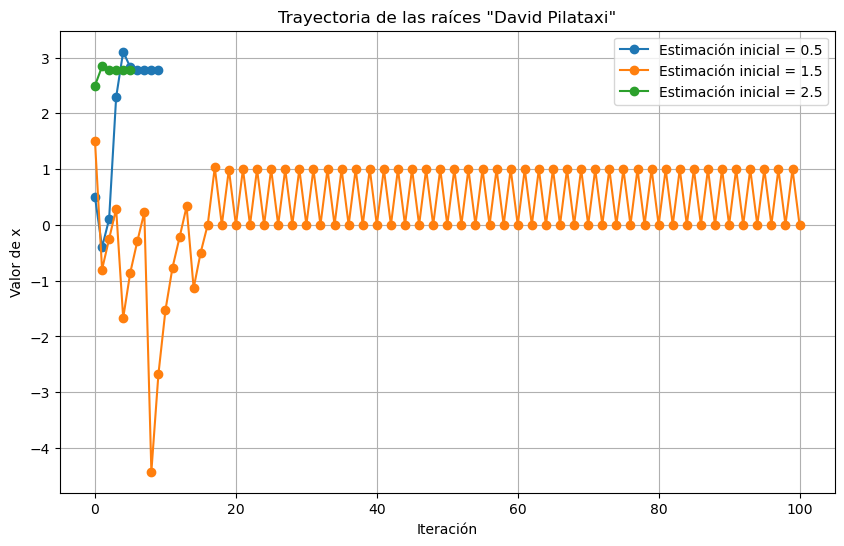

In [8]:
import matplotlib.pyplot as plt

# Definir la función y su derivada
def y(x):
    return x**3 - 3*x**2 + x - 1

def dy_dx(x):
    return 3*x**2 - 6*x + 1

# Implementar el método de Newton-Raphson que almacena las estimaciones
def newton_raphson_trace(func, deriv, x0, tol=1e-6, max_iter=100):
    x = x0
    estimaciones = [x]  # Lista para almacenar las estimaciones
    for i in range(max_iter):
        fx = func(x)
        dfx = deriv(x)
        if abs(dfx) < 1e-10:
            print("La derivada es cero, el método falla.")
            return None, estimaciones
        x_new = x - fx / dfx
        estimaciones.append(x_new)  # Guardar la nueva estimación
        if abs(x_new - x) < tol:
            return x_new, estimaciones
        x = x_new
    print("Máximo de iteraciones alcanzado.")
    return x, estimaciones

# Definir tres estimaciones iniciales diferentes
initial_guesses = [0.5, 1.5, 2.5]

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Ejecutar el método de Newton-Raphson para cada estimación inicial y graficar las trayectorias
for guess in initial_guesses:
    root, trace = newton_raphson_trace(y, dy_dx, guess)
    plt.plot(trace, marker='o', label=f'Estimación inicial = {guess}')

# Personalizar el gráfico
plt.xlabel('Iteración')
plt.ylabel('Valor de x')
plt.title('Trayectoria de las raíces "David Pilataxi"')
plt.legend()
plt.grid(True)
plt.show()

### ¿Cómo ejecutar el código y evitar que de error para toda estimación?
- Sin ejecutar try except

In [9]:
# Definir la función y su derivada
def y(x):
    return x**3 - 3*x**2 + x - 1

def dy_dx(x):
    return 3*x**2 - 6*x + 1

# Implementar el método de Newton-Raphson con control de errores y redondeo
def newton_raphson_trace(func, deriv, x0, tol=1e-6, max_iter=100):
    x = x0
    estimaciones = [round(x, 5)]  # Lista para almacenar las estimaciones con redondeo
    for i in range(max_iter):
        fx = func(x)
        dfx = deriv(x)
        
        # Verificar que la derivada no sea demasiado pequeña
        if abs(dfx) < 1e-10:
            print(f"Detenido: La derivada es muy pequeña en x = {x}.")
            return None, estimaciones  # Devuelve la lista de estimaciones hasta el momento
        
        # Calcular la siguiente estimación
        x_new = x - fx / dfx
        estimaciones.append(round(x_new, 5))  # Guardar la nueva estimación redondeada
        
        # Verificar la convergencia
        if abs(x_new - x) < tol:
            return round(x_new, 5), estimaciones
        
        # Actualizar x para la siguiente iteración
        x = x_new
    
    print("Máximo de iteraciones alcanzado sin convergencia.")
    return None, estimaciones

# Ejemplo de uso con diferentes estimaciones iniciales
initial_guesses = [0.5, 1.5, 2.5]

# Ejecutar el método para cada estimación inicial
for guess in initial_guesses:
    root, trace = newton_raphson_trace(y, dy_dx, guess)
    print(f"Estimación inicial = {guess}")
    print("Raíz encontrada:", root)
    print("Trayectoria de las estimaciones:", trace)
    print()


Estimación inicial = 0.5
Raíz encontrada: 2.76929
Trayectoria de las estimaciones: [0.5, -0.4, 0.10103, 2.28878, 3.10577, 2.8292, 2.77172, 2.7693, 2.76929, 2.76929]

Máximo de iteraciones alcanzado sin convergencia.
Estimación inicial = 1.5
Raíz encontrada: None
Trayectoria de las estimaciones: [1.5, -0.8, -0.25181, 0.28797, -1.66791, -0.85907, -0.29659, 0.22472, -4.42583, -2.67786, -1.52717, -0.7646, -0.22445, 0.33078, -1.13358, -0.49486, 0.00489, 1.03006, -0.00138, 0.99175, -0.0001, 0.99939, -0.0, 1.0, -0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]

Estimación inicial = 2.5
Raíz encontrada: 2.76929
Trayectoria de las estimaciones: [2.5, 2.84211, 2.772